In [1]:
cd datasets/NLS

C:\Users\Daniele\Desktop\Materiale Tesi\Tesi magistrale\datasets\NLS


# Import

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

# Aggiungo gli headers al CSV
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv('KDDTrain+.csv', encoding='cp1252', names = col_names)
df_test = pd.read_csv('KDDTest+.csv', encoding='cp1252', names = col_names)

labeldf=df['label']
labeldf_test=df_test['label']

C:\Users\Daniele\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Daniele\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Functions

In [3]:
#Dataset Preparation ----------------------------------------------------------------------------------------------------------

def prepareMulticlass():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    return newlabeldf, newlabeldf_test

def prepareBinary():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    return newlabeldf, newlabeldf_test
  
colNames=list()
colNames_test=list()

def getFullDf():
    global colNames
    colNames=list(df)
    return df

def getFullDfTest():
    global colNames_test
    colNames_test=list(df_test)
    return df_test

def getReducedDf():
    global colNames
    df_reduced=df.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames=list(df_reduced)
    return df_reduced

def getReducedDfTest():
    global colNames_test
    df_reduced=df_test.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames_test=list(df_reduced)
    return df_reduced

def oneHotEcoding(df, column_name):
    df_drop = df.drop(column_name, axis=1, inplace=False)
    one_hot = pd.get_dummies(df[column_name])
    if(column_name == 'service'):
        column_list=list()
        for string in one_hot.columns.tolist():
            column_list.append(column_name+'_'+str(string))
        one_hot.columns=column_list
    df = pd.concat([df_drop, one_hot], axis=1)
    
    return df

def getXandY(df):
    X = df.drop('label',axis=1, inplace=False)
    Y = df.label
    return X, Y

def overSampledDF(X, Y): 
    sm = SMOTE(random_state=42)
    X_resampled, Y_resampled = sm.fit_resample(X, Y)
    df = pd.concat([X_resampled, Y_resampled], axis=1)
    return df

def createMulticlassDF(df):
    to_drop_DoS = [0,1]
    to_drop_Probe = [0,2]
    to_drop_R2L = [0,3]
    to_drop_U2R = [0,4]

    DoS_df=df[df['label'].isin(to_drop_DoS)];
    Probe_df=df[df['label'].isin(to_drop_Probe)];
    R2L_df=df[df['label'].isin(to_drop_R2L)];
    U2R_df=df[df['label'].isin(to_drop_U2R)];
    return DoS_df, Probe_df, R2L_df, U2R_df 

def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler.transform(df) 

def minMaxScaler(df):
    scaler = preprocessing.MinMaxScaler().fit(df)
    return scaler.transform(df)

def recursiveFeatureExtraction(model, X, Y, n):
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X, Y)
    X=rfe.transform(X)
    true=rfe.support_
    rfecolindex=[i for i, x in enumerate(true) if x]
    rfecolname=list(colNames[i] for i in rfecolindex)
    return X, rfecolindex

def adaptTestset(train, test):
    train_service_list=[]
    test_service_list = []
    
    for string in train.columns.tolist():
        if('service' in string):
            train_service_list.append(string)
    
    for string in test.columns.tolist():
        if('service' in string):
            test_service_list.append(string)

    difference=list(set(train_service_list) - set(test_service_list))

    for col in difference:
        test[col] = 0
    return test.reindex(columns=train.columns)

# Algorythms-------------------------------------------------------------------------------------------------------------------- 

def SVM(X, Y):
    clf = LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000)
    return clf.fit(X, Y)

def stratifiedCV(model, X, Y, k, pos_label):
    skf = StratifiedKFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}
  
    
def KfoldCV(model, X, Y, k, pos_label):
    skf = KFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred )
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}

#Plotting-----------------------------------------------------------------------------------------------------------------------

def plotDf(y):
    plt.figure(figsize=(10,5))
    class_distribution = y.value_counts()
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Data points per Class')
    plt.title('Distribution of yi in train data')
    plt.grid()
    return plt

def plotConfusionMatrix(Y_pred, Y_test, pos_label):
    skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
    plt.show()
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy: %0.5f " % accuracy)
    precision = precision_score(Y_test, Y_pred, pos_label=pos_label)
    print("Precision: %0.5f " % precision)
    recall = recall_score(Y_test, Y_pred, pos_label=pos_label)
    print("Recall: %0.5f " % recall)
    f = f1_score(Y_test, Y_pred, pos_label=pos_label)
    print("F-measure: %0.5f " % f)

# Reduced DF, no oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

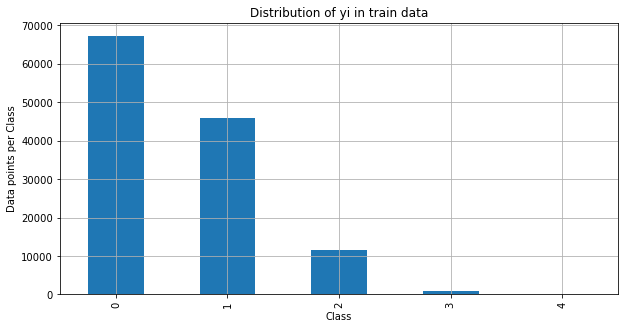

In [4]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

plotDf(reducedDf['label'])


In [5]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(reducedDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(reducedDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [6]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [7]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9787194804940016,
 'Mean Training Precision': 0.9917103349034505,
 'Mean Training Recall': 0.9555017135320856,
 'Mean Training F1 Score': 0.9732608597199665,
 'Mean Validation Accuracy': 0.9786616050145669,
 'Mean Validation Precision': 0.991863632423961,
 'Mean Validation Recall': 0.9552259367616049,
 'Mean Validation F1 Score': 0.9731916188528951}

#### K-fold cross validation on dos Standard Scaler

In [8]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9897874302306189,
 'Mean Training Precision': 0.9895370632037576,
 'Mean Training Recall': 0.9852300398872341,
 'Mean Training F1 Score': 0.9873788403580235,
 'Mean Validation Accuracy': 0.9896706983314205,
 'Mean Validation Precision': 0.9893161160111559,
 'Mean Validation Recall': 0.9851549405295081,
 'Mean Validation F1 Score': 0.9872281645227206}

#### Stratified cross validation on dos

In [9]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9784565884857225,
 'Mean Training Precision': 0.9917502796569938,
 'Mean Training Recall': 0.9548099397843501,
 'Mean Training F1 Score': 0.9729276068851215,
 'Mean Validation Accuracy': 0.9784320649774875,
 'Mean Validation Precision': 0.9918126889749759,
 'Mean Validation Recall': 0.9546889591493188,
 'Mean Validation F1 Score': 0.9728925432873629}

#### Stratified cross validation on dos Standard Scaler

In [10]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9897952777532544,
 'Mean Training Precision': 0.9895419526745975,
 'Mean Training Recall': 0.9852447010501457,
 'Mean Training F1 Score': 0.9873886343904961,
 'Mean Validation Accuracy': 0.9896883552573497,
 'Mean Validation Precision': 0.9893989153396662,
 'Mean Validation Recall': 0.9851286393625809,
 'Mean Validation F1 Score': 0.9872558602102497}

#### Predict on dos

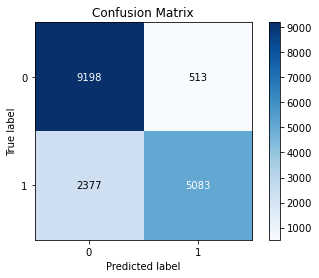

Accuracy: 0.83169 
Precision: 0.90833 
Recall: 0.68137 
F-measure: 0.77865 


In [11]:
y_dos_prediction = SVM(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

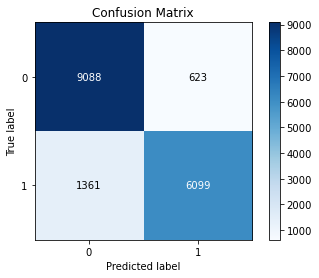

Accuracy: 0.88446 
Precision: 0.90732 
Recall: 0.81756 
F-measure: 0.86010 


In [12]:
y_dos_prediction = SVM(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [13]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9421989761943038,
 'Mean Training Precision': 0.8294208280740222,
 'Mean Training Recall': 0.7694139601183921,
 'Mean Training F1 Score': 0.7936453583224943,
 'Mean Validation Accuracy': 0.9422272263273191,
 'Mean Validation Precision': 0.8293218148246696,
 'Mean Validation Recall': 0.769392535879188,
 'Mean Validation F1 Score': 0.793166494569432}

#### K-fold cross validation on probe Standard Scaler

In [14]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9556773568180293,
 'Mean Training Precision': 0.850218485328732,
 'Mean Training Recall': 0.8492114851331476,
 'Mean Training F1 Score': 0.8497128257757665,
 'Mean Validation Accuracy': 0.9554424770961234,
 'Mean Validation Precision': 0.8492039838351841,
 'Mean Validation Recall': 0.8486045020552524,
 'Mean Validation F1 Score': 0.848854311879293}

#### Stratified cross validation on probe

In [15]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9275532057487087,
 'Mean Training Precision': 0.829621630439136,
 'Mean Training Recall': 0.6477821518267189,
 'Mean Training F1 Score': 0.6928925280435098,
 'Mean Validation Accuracy': 0.927986679935451,
 'Mean Validation Precision': 0.8347265443342049,
 'Mean Validation Recall': 0.6469677338614096,
 'Mean Validation F1 Score': 0.6931550092737208}

#### Stratified cross validation on probe Standard Scaler

In [16]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9556872023437378,
 'Mean Training Precision': 0.850166762278041,
 'Mean Training Recall': 0.8493670420122236,
 'Mean Training F1 Score': 0.8497651373399091,
 'Mean Validation Accuracy': 0.955379187559393,
 'Mean Validation Precision': 0.8490087971986521,
 'Mean Validation Recall': 0.8485759612482424,
 'Mean Validation F1 Score': 0.8487530245086095}

#### Predict on probe

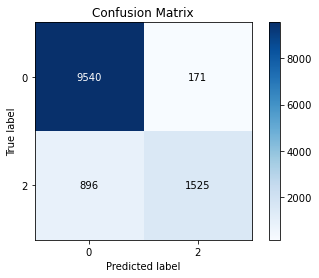

Accuracy: 0.91205 
Precision: 0.89917 
Recall: 0.62990 
F-measure: 0.74083 


In [17]:
y_probe_prediction = SVM(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

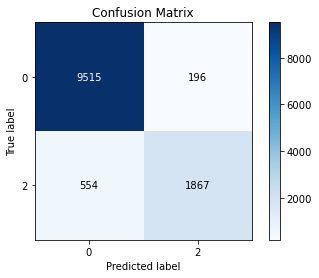

Accuracy: 0.93818 
Precision: 0.90499 
Recall: 0.77117 
F-measure: 0.83274 


In [18]:
y_probe_prediction = SVM(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [19]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9906087672245796,
 'Mean Training Precision': 0.7173416213067437,
 'Mean Training Recall': 0.5532512191998683,
 'Mean Training F1 Score': 0.6054585246736157,
 'Mean Validation Accuracy': 0.9905469917138937,
 'Mean Validation Precision': 0.6986822570001694,
 'Mean Validation Recall': 0.5562958343400451,
 'Mean Validation F1 Score': 0.6026932377658565}

#### K-fold cross validation on r2l Standard Scaler

In [20]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9921631369054029,
 'Mean Training Precision': 0.7579848747262782,
 'Mean Training Recall': 0.6780729547968769,
 'Mean Training F1 Score': 0.7157435805701408,
 'Mean Validation Accuracy': 0.991995637295483,
 'Mean Validation Precision': 0.7485405085520621,
 'Mean Validation Recall': 0.6729820604819167,
 'Mean Validation F1 Score': 0.7082537659838564}

#### Stratified cross validation on r2l

In [21]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9907648643088924,
 'Mean Training Precision': 0.7194292807954833,
 'Mean Training Recall': 0.5792340881883479,
 'Mean Training F1 Score': 0.6349713123839561,
 'Mean Validation Accuracy': 0.9907371570963803,
 'Mean Validation Precision': 0.7116201474246656,
 'Mean Validation Recall': 0.579919191919192,
 'Mean Validation F1 Score': 0.6311803349435197}

#### Stratified cross validation on r2l Standard Scaler

In [22]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9921793960105016,
 'Mean Training Precision': 0.7591375651616621,
 'Mean Training Recall': 0.677943934557063,
 'Mean Training F1 Score': 0.7161837839708556,
 'Mean Validation Accuracy': 0.9920541724534754,
 'Mean Validation Precision': 0.7512995193203186,
 'Mean Validation Recall': 0.6794545454545454,
 'Mean Validation F1 Score': 0.7131592071603248}

#### Predict on r2l

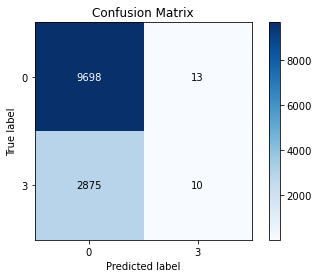

Accuracy: 0.77072 
Precision: 0.43478 
Recall: 0.00347 
F-measure: 0.00688 


In [23]:
y_r2l_prediction = SVM(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

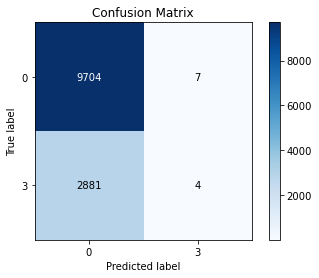

Accuracy: 0.77072 
Precision: 0.36364 
Recall: 0.00139 
F-measure: 0.00276 


In [24]:
y_r2l_prediction = SVM(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [25]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9994757273217652,
 'Mean Training Precision': 0.7123690021201144,
 'Mean Training Recall': 0.43805553863122915,
 'Mean Training F1 Score': 0.5418388169740567,
 'Mean Validation Accuracy': 0.9994658313382881,
 'Mean Validation Precision': 0.66,
 'Mean Validation Recall': 0.43083333333333335,
 'Mean Validation F1 Score': 0.5111688311688312}

#### K-fold cross validation on u2r Standard Scaler

In [26]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9996191606560675,
 'Mean Training Precision': 0.902106542882405,
 'Mean Training Recall': 0.5683547109029466,
 'Mean Training F1 Score': 0.69716463771627,
 'Mean Validation Accuracy': 0.9995251829225602,
 'Mean Validation Precision': 0.8166666666666668,
 'Mean Validation Recall': 0.5316666666666667,
 'Mean Validation F1 Score': 0.6264285714285714}

#### Stratified cross validation on u2r

In [27]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.999454295063555,
 'Mean Training Precision': 0.6364768945212493,
 'Mean Training Recall': 0.3978260869565217,
 'Mean Training F1 Score': 0.4887054156927575,
 'Mean Validation Accuracy': 0.9994064775523845,
 'Mean Validation Precision': 0.4883333333333334,
 'Mean Validation Recall': 0.3433333333333333,
 'Mean Validation F1 Score': 0.39471861471861475}

#### Stratified cross validation on u2r Standard Scaler

In [28]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9996191606288868,
 'Mean Training Precision': 0.9044935583923348,
 'Mean Training Recall': 0.5662349676225716,
 'Mean Training F1 Score': 0.6960380996790513,
 'Mean Validation Accuracy': 0.999510346127308,
 'Mean Validation Precision': 0.7016666666666668,
 'Mean Validation Recall': 0.5233333333333333,
 'Mean Validation F1 Score': 0.5893650793650792}

#### Predict on u2r

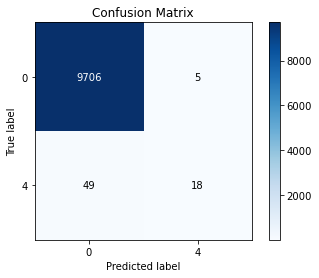

Accuracy: 0.99448 
Precision: 0.78261 
Recall: 0.26866 
F-measure: 0.40000 


In [29]:
y_u2r_prediction = SVM(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

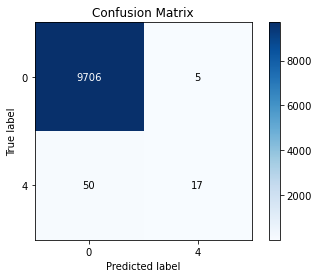

Accuracy: 0.99438 
Precision: 0.77273 
Recall: 0.25373 
F-measure: 0.38202 


In [30]:
y_u2r_prediction = SVM(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Feature Selection

In [31]:

X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [32]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [33]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9605073423383654,
 'Mean Training Precision': 0.9849022707282394,
 'Mean Training Recall': 0.9166504643397942,
 'Mean Training F1 Score': 0.9495514395891741,
 'Mean Validation Accuracy': 0.9605191136223183,
 'Mean Validation Precision': 0.9848495490570265,
 'Mean Validation Recall': 0.9167252872076844,
 'Mean Validation F1 Score': 0.9495598869852806}

#### K-fold cross validation on dos Standard Scaler

In [34]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.98576557488008,
 'Mean Training Precision': 0.988336279955614,
 'Mean Training Recall': 0.9764165534933363,
 'Mean Training F1 Score': 0.9823402468310043,
 'Mean Validation Accuracy': 0.9857243753862454,
 'Mean Validation Precision': 0.988266807381699,
 'Mean Validation Recall': 0.97638674862584,
 'Mean Validation F1 Score': 0.9822880920917403}

#### Stratified cross validation on dos

In [35]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9605112660996833,
 'Mean Training Precision': 0.9849026302422187,
 'Mean Training Recall': 0.9166600139725073,
 'Mean Training F1 Score': 0.9495567480781775,
 'Mean Validation Accuracy': 0.9605102851593538,
 'Mean Validation Precision': 0.984867167606097,
 'Mean Validation Recall': 0.9166939246664558,
 'Mean Validation F1 Score': 0.9495532927530659}

#### Stratified cross validation on dos Standard Scaler

In [36]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9857655748800802,
 'Mean Training Precision': 0.9883362358679137,
 'Mean Training Recall': 0.9764166812536749,
 'Mean Training F1 Score': 0.9823402882134701,
 'Mean Validation Accuracy': 0.9857332038492099,
 'Mean Validation Precision': 0.9882587589836914,
 'Mean Validation Recall': 0.9764191276150423,
 'Mean Validation F1 Score': 0.9823003743831243}

#### Predict on dos

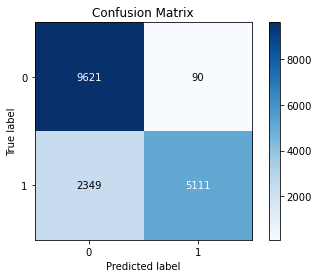

Accuracy: 0.85796 
Precision: 0.98270 
Recall: 0.68512 
F-measure: 0.80736 


In [37]:
y_dos_rfe_prediction = SVM(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

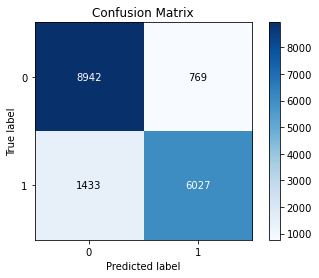

Accuracy: 0.87176 
Precision: 0.88685 
Recall: 0.80791 
F-measure: 0.84554 


In [38]:
y_dos_rfe_prediction = SVM(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [39]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9514916499722688,
 'Mean Training Precision': 0.8323142244836248,
 'Mean Training Recall': 0.8405859125043419,
 'Mean Training F1 Score': 0.8364290417113838,
 'Mean Validation Accuracy': 0.9513791266640066,
 'Mean Validation Precision': 0.831349228891292,
 'Mean Validation Recall': 0.8408680592526687,
 'Mean Validation F1 Score': 0.8360629900732196}

#### K-fold cross validation on probe Standard Scaler

In [40]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.956920692446255,
 'Mean Training Precision': 0.8628876569620845,
 'Mean Training Recall': 0.8417955268606916,
 'Mean Training F1 Score': 0.8522094265008008,
 'Mean Validation Accuracy': 0.9569868065337545,
 'Mean Validation Precision': 0.8628850970705704,
 'Mean Validation Recall': 0.8421849544350272,
 'Mean Validation F1 Score': 0.8523577280448471}

#### Stratified cross validation on probe

In [41]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9513988216822291,
 'Mean Training Precision': 0.8317777507014407,
 'Mean Training Recall': 0.8406161775234462,
 'Mean Training F1 Score': 0.8361728405453734,
 'Mean Validation Accuracy': 0.9512778624437319,
 'Mean Validation Precision': 0.8308714237852811,
 'Mean Validation Recall': 0.841025699541369,
 'Mean Validation F1 Score': 0.8359031299918733}

#### Stratified cross validation on probe Standard Scaler

In [42]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9569727325791186,
 'Mean Training Precision': 0.8632092164123735,
 'Mean Training Recall': 0.8417791517519351,
 'Mean Training F1 Score': 0.8523586031554549,
 'Mean Validation Accuracy': 0.9570754173337115,
 'Mean Validation Precision': 0.8636862032556785,
 'Mean Validation Recall': 0.8420563313923101,
 'Mean Validation F1 Score': 0.852697513762332}

#### Predict on probe

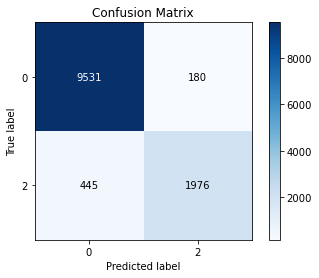

Accuracy: 0.94848 
Precision: 0.91651 
Recall: 0.81619 
F-measure: 0.86345 


In [43]:
y_probe_rfe_prediction = SVM(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

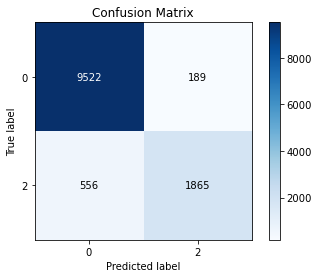

Accuracy: 0.93859 
Precision: 0.90798 
Recall: 0.77034 
F-measure: 0.83352 


In [44]:
y_probe_rfe_prediction = SVM(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [45]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9846400734553613,
 'Mean Training Precision': 0.06511528343895351,
 'Mean Training Recall': 0.004016608917959346,
 'Mean Training F1 Score': 0.007554387329594264,
 'Mean Validation Accuracy': 0.9846498261698112,
 'Mean Validation Precision': 0.06027777777777778,
 'Mean Validation Recall': 0.0037353698323083274,
 'Mean Validation F1 Score': 0.007006906824808019}

#### K-fold cross validation on r2l Standard Scaler

In [46]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9905388563242111,
 'Mean Training Precision': 0.7153917800304612,
 'Mean Training Recall': 0.5803426968833951,
 'Mean Training F1 Score': 0.640608285933343,
 'Mean Validation Accuracy': 0.9905469660161584,
 'Mean Validation Precision': 0.7151206193737343,
 'Mean Validation Recall': 0.5797979809194529,
 'Mean Validation F1 Score': 0.6396015200665254}

#### Stratified cross validation on r2l

In [47]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9845977999142814,
 'Mean Training Precision': 0.06096724622874505,
 'Mean Training Recall': 0.004020101755786113,
 'Mean Training F1 Score': 0.0075425791560778345,
 'Mean Validation Accuracy': 0.9845913038606863,
 'Mean Validation Precision': 0.05456349206349206,
 'Mean Validation Recall': 0.00402020202020202,
 'Mean Validation F1 Score': 0.0074769620616913866}

#### Stratified cross validation on r2l Standard Scaler

In [48]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9906006409764576,
 'Mean Training Precision': 0.7174797869911373,
 'Mean Training Recall': 0.5843612829209897,
 'Mean Training F1 Score': 0.6440041711753595,
 'Mean Validation Accuracy': 0.9905323354388772,
 'Mean Validation Precision': 0.7141627584333186,
 'Mean Validation Recall': 0.5839999999999999,
 'Mean Validation F1 Score': 0.642087169934108}

#### Predict on r2l

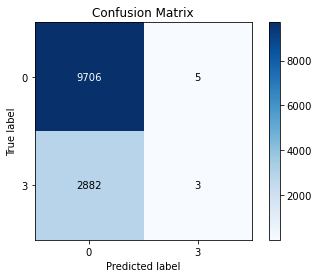

Accuracy: 0.77080 
Precision: 0.37500 
Recall: 0.00104 
F-measure: 0.00207 


In [49]:
y_r2l_rfe_prediction = SVM(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

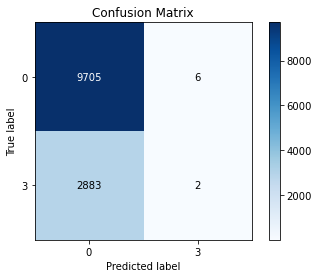

Accuracy: 0.77064 
Precision: 0.25000 
Recall: 0.00069 
F-measure: 0.00138 


In [50]:
y_r2l_rfe_prediction = SVM(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [51]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9993009703150264,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.09353215888996251,
 'Mean Training F1 Score': 0.17006231126541888,
 'Mean Validation Accuracy': 0.9992581073982307,
 'Mean Validation Precision': 0.3,
 'Mean Validation Recall': 0.049166666666666664,
 'Mean Validation F1 Score': 0.08412698412698413}

#### K-fold cross validation on u2r Standard Scaler

In [52]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9994147272593802,
 'Mean Training Precision': 0.877232967410986,
 'Mean Training Recall': 0.27790559815718396,
 'Mean Training F1 Score': 0.41929348945204603,
 'Mean Validation Accuracy': 0.9993768083651433,
 'Mean Validation Precision': 0.7333333333333334,
 'Mean Validation Recall': 0.27666666666666667,
 'Mean Validation F1 Score': 0.38350649350649346}

#### Stratified cross validation on u2r

In [53]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9992976729776265,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.08968547641073081,
 'Mean Training F1 Score': 0.16317873303167418,
 'Mean Validation Accuracy': 0.9992581073982306,
 'Mean Validation Precision': 0.3,
 'Mean Validation Recall': 0.056666666666666664,
 'Mean Validation F1 Score': 0.09523809523809525}

#### Stratified cross validation on u2r Standard Scaler

In [54]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9994130786450413,
 'Mean Training Precision': 0.8755299073991024,
 'Mean Training Recall': 0.275531914893617,
 'Mean Training F1 Score': 0.415753171622159,
 'Mean Validation Accuracy': 0.9993768105667747,
 'Mean Validation Precision': 0.725,
 'Mean Validation Recall': 0.27666666666666667,
 'Mean Validation F1 Score': 0.38571428571428573}

#### Predict on u2r

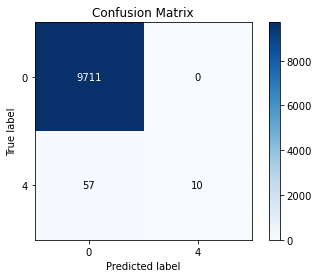

Accuracy: 0.99417 
Precision: 1.00000 
Recall: 0.14925 
F-measure: 0.25974 


In [55]:
y_u2r_rfe_prediction = SVM(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

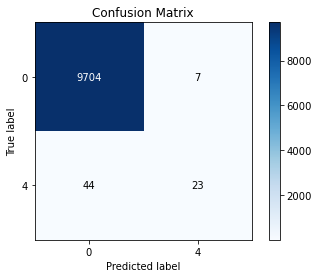

Accuracy: 0.99478 
Precision: 0.76667 
Recall: 0.34328 
F-measure: 0.47423 


In [56]:
y_u2r_rfe_prediction = SVM(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

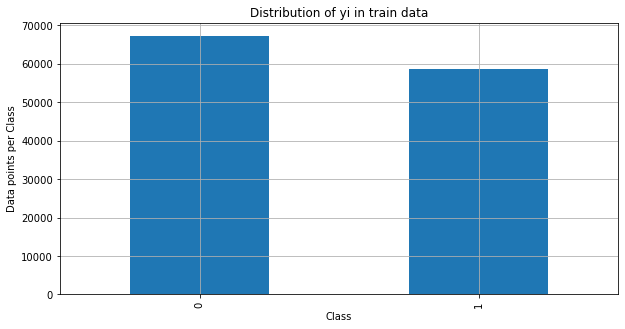

In [4]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareBinary()
plotDf(reducedDf['label'])

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)

#### K-fold cross validation

In [58]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9012204700807622,
 'Mean Training Precision': 0.9276921881558557,
 'Mean Training Recall': 0.8543193351590116,
 'Mean Training F1 Score': 0.8894526460282579,
 'Mean Validation Accuracy': 0.901161243709916,
 'Mean Validation Precision': 0.9275815104481004,
 'Mean Validation Recall': 0.8542065369994356,
 'Mean Validation F1 Score': 0.889326883095967}

#### K-fold cross validation Standard Scaler

In [59]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9470927192025146,
 'Mean Training Precision': 0.9489011617066175,
 'Mean Training Recall': 0.9367688142539583,
 'Mean Training F1 Score': 0.9427956103784731,
 'Mean Validation Accuracy': 0.9469251782859723,
 'Mean Validation Precision': 0.9487237353458944,
 'Mean Validation Recall': 0.9365923091947893,
 'Mean Validation F1 Score': 0.942615787979625}

#### Predict

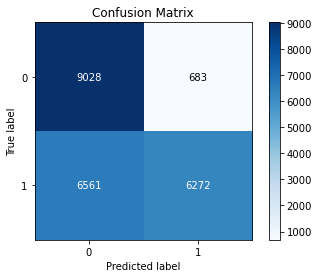

Accuracy: 0.67867 
Precision: 0.90180 
Recall: 0.48874 
F-measure: 0.63392 


In [5]:
y_prediction = SVM(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

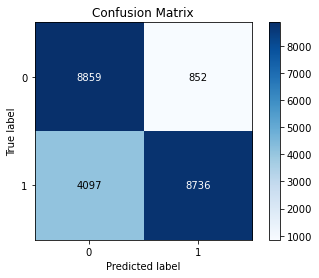

Accuracy: 0.78047 
Precision: 0.91114 
Recall: 0.68074 
F-measure: 0.77927 


In [6]:
y_prediction = SVM(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [7]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), x_df, y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [8]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), x_df_ss, y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [64]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9287960294940005,
 'Mean Training Precision': 0.9383420524500256,
 'Mean Training Recall': 0.9065817709466509,
 'Mean Training F1 Score': 0.9221884849227815,
 'Mean Validation Accuracy': 0.9286831132781421,
 'Mean Validation Precision': 0.9380970563267386,
 'Mean Validation Recall': 0.9065742248375834,
 'Mean Validation F1 Score': 0.9220608861797551}

#### K-fold cross validation Standard Scaler

In [65]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9313124421619909,
 'Mean Training Precision': 0.9297342503350687,
 'Mean Training Recall': 0.9221066280091025,
 'Mean Training F1 Score': 0.9259046851950107,
 'Mean Validation Accuracy': 0.9312789713247647,
 'Mean Validation Precision': 0.9297039978593531,
 'Mean Validation Recall': 0.9220627598246164,
 'Mean Validation F1 Score': 0.9258628002766844}

#### Predict

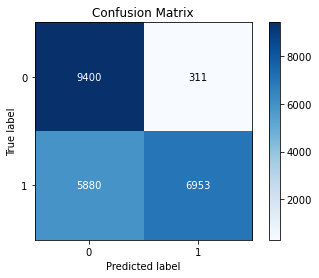

Accuracy: 0.72538 
Precision: 0.95719 
Recall: 0.54181 
F-measure: 0.69194 


In [9]:
y_prediction = SVM(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

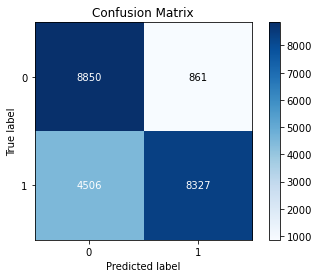

Accuracy: 0.76193 
Precision: 0.90629 
Recall: 0.64887 
F-measure: 0.75628 


In [10]:
y_prediction = SVM(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

# Reduced DF, oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

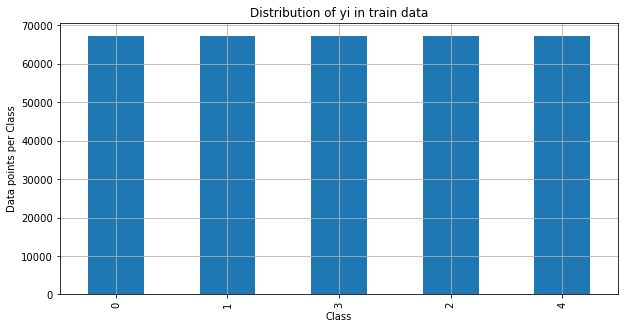

In [68]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)


oversampled_df = overSampledDF(x_df, y_df)
oversampled_df_test = overSampledDF(x_df_test, y_df_test)

plotDf(oversampled_df['label'])

In [69]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(oversampled_df)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(oversampled_df_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [70]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [71]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9755266087893327,
 'Mean Training Precision': 0.9919955960134091,
 'Mean Training Recall': 0.9588742030948592,
 'Mean Training F1 Score': 0.97514349082752,
 'Mean Validation Accuracy': 0.9760775990618591,
 'Mean Validation Precision': 0.9902199216905497,
 'Mean Validation Recall': 0.9590912036296719,
 'Mean Validation F1 Score': 0.9743982162672055}

#### K-fold cross validation on dos Standard Scaler

In [72]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9898471672387334,
 'Mean Training Precision': 0.9918676382048808,
 'Mean Training Recall': 0.9877432626235955,
 'Mean Training F1 Score': 0.9898011484100356,
 'Mean Validation Accuracy': 0.989516318401165,
 'Mean Validation Precision': 0.9900834379176662,
 'Mean Validation Recall': 0.9875687835690595,
 'Mean Validation F1 Score': 0.9888170530495325}

#### Stratified cross validation on dos

In [73]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9753055233369355,
 'Mean Training Precision': 0.9920934765110928,
 'Mean Training Recall': 0.958246908729223,
 'Mean Training F1 Score': 0.9748739887666857,
 'Mean Validation Accuracy': 0.9753871968550119,
 'Mean Validation Precision': 0.9921459070033745,
 'Mean Validation Recall': 0.9583624942644986,
 'Mean Validation F1 Score': 0.9749559531263232}

#### Stratified cross validation on dos Standard Scaler

In [74]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9897960193314661,
 'Mean Training Precision': 0.9918630173386532,
 'Mean Training Recall': 0.987694836253979,
 'Mean Training F1 Score': 0.9897745332919777,
 'Mean Validation Accuracy': 0.9896945400787558,
 'Mean Validation Precision': 0.9917699096334271,
 'Mean Validation Recall': 0.987585963064805,
 'Mean Validation F1 Score': 0.9896725580985255}

#### Predict on dos

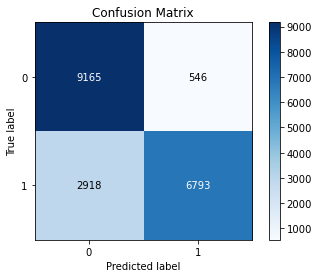

Accuracy: 0.82165 
Precision: 0.92560 
Recall: 0.69952 
F-measure: 0.79683 


In [75]:
y_dos_prediction = SVM(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

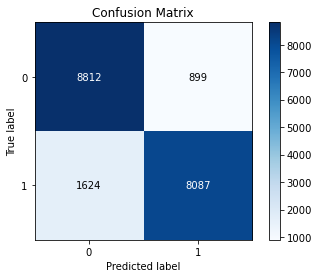

Accuracy: 0.87010 
Precision: 0.89996 
Recall: 0.83277 
F-measure: 0.86506 


In [76]:
y_dos_prediction = SVM(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [77]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.7673444427810947,
 'Mean Training Precision': 0.8500837682792219,
 'Mean Training Recall': 0.645004799752817,
 'Mean Training F1 Score': 0.7319759346447167,
 'Mean Validation Accuracy': 0.7426861411158688,
 'Mean Validation Precision': 0.6984389621947579,
 'Mean Validation Recall': 0.6442404028875902,
 'Mean Validation F1 Score': 0.6427107008206663}

#### K-fold cross validation on probe Standard Scaling

In [78]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9501870281283322,
 'Mean Training Precision': 0.936888542952311,
 'Mean Training Recall': 0.9640375874313332,
 'Mean Training F1 Score': 0.9502691080701267,
 'Mean Validation Accuracy': 0.9450503254423367,
 'Mean Validation Precision': 0.8378956641253467,
 'Mean Validation Recall': 0.9618297367955687,
 'Mean Validation F1 Score': 0.8894147489316296}

#### Stratified cross validation on probe

In [79]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.7529298512247282,
 'Mean Training Precision': 0.8501280070201528,
 'Mean Training Recall': 0.6141840846035758,
 'Mean Training F1 Score': 0.7130675086598577,
 'Mean Validation Accuracy': 0.7530033992410561,
 'Mean Validation Precision': 0.8499539256063862,
 'Mean Validation Recall': 0.6145703715414184,
 'Mean Validation F1 Score': 0.7132158870127203}

#### Stratified cross validation on probe Standard Scaling

In [80]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9504732822076303,
 'Mean Training Precision': 0.9372684988888154,
 'Mean Training Recall': 0.9655725987886538,
 'Mean Training F1 Score': 0.9512100045974357,
 'Mean Validation Accuracy': 0.9504551448515365,
 'Mean Validation Precision': 0.9372465292416428,
 'Mean Validation Recall': 0.9655643171010654,
 'Mean Validation F1 Score': 0.9511920317856953}

#### Predict on probe

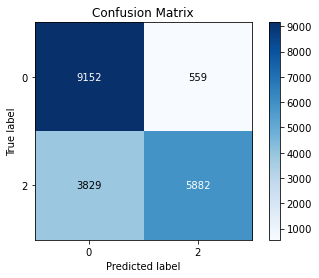

Accuracy: 0.77407 
Precision: 0.91321 
Recall: 0.60570 
F-measure: 0.72833 


In [81]:
y_probe_rfe_prediction = SVM(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

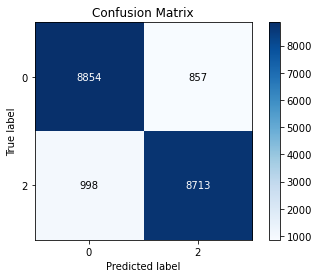

Accuracy: 0.90449 
Precision: 0.91045 
Recall: 0.89723 
F-measure: 0.90379 


In [82]:
y_probe_rfe_prediction = SVM(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [83]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9133044510442542,
 'Mean Training Precision': 0.9238354765921836,
 'Mean Training Recall': 0.9066347086793851,
 'Mean Training F1 Score': 0.9117056372033284,
 'Mean Validation Accuracy': 0.9342772416515828,
 'Mean Validation Precision': 0.5761764967741522,
 'Mean Validation Recall': 0.9053960793220768,
 'Mean Validation F1 Score': 0.6136657734221499}

#### K-fold cross validation on r2l Standard Scaling

In [84]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9740161087228559,
 'Mean Training Precision': 0.9700632125076257,
 'Mean Training Recall': 0.9774342624356323,
 'Mean Training F1 Score': 0.9737325330145469,
 'Mean Validation Accuracy': 0.9688090410471435,
 'Mean Validation Precision': 0.6456559980815231,
 'Mean Validation Recall': 0.9748239551461728,
 'Mean Validation F1 Score': 0.7174953216638534}

#### Stratified cross validation on r2l

In [85]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9160738773971966,
 'Mean Training Precision': 0.9191715562089264,
 'Mean Training Recall': 0.9141775288612731,
 'Mean Training F1 Score': 0.9114805665960795,
 'Mean Validation Accuracy': 0.9172450177257512,
 'Mean Validation Precision': 0.9200896515350614,
 'Mean Validation Recall': 0.9154609821647683,
 'Mean Validation F1 Score': 0.9128035429014576}

#### Stratified cross validation on r2l Standard Scaling

In [86]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9723232802349389,
 'Mean Training Precision': 0.9696153061882914,
 'Mean Training Recall': 0.9752065291035867,
 'Mean Training F1 Score': 0.9724028501300032,
 'Mean Validation Accuracy': 0.9721945847864625,
 'Mean Validation Precision': 0.9693912086821879,
 'Mean Validation Recall': 0.9751867254317143,
 'Mean Validation F1 Score': 0.972278455917596}

#### Predict on r2l

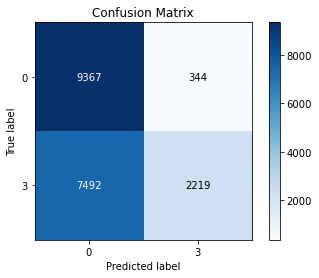

Accuracy: 0.59654 
Precision: 0.86578 
Recall: 0.22850 
F-measure: 0.36158 


In [87]:
y_r2l_rfe_prediction = SVM(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

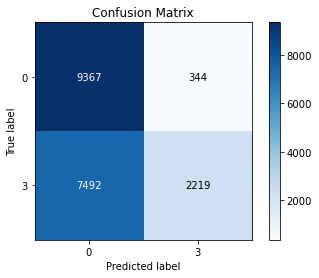

Accuracy: 0.59654 
Precision: 0.86578 
Recall: 0.22850 
F-measure: 0.36158 


In [88]:
y_probe_rfy_r2l_rfe_predictione_prediction = SVM(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [89]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9732109401916722,
 'Mean Training Precision': 0.9510051068672715,
 'Mean Training Recall': 0.9977136831614566,
 'Mean Training F1 Score': 0.9737706198230385,
 'Mean Validation Accuracy': 0.9668348512527739,
 'Mean Validation Precision': 0.5064637471016907,
 'Mean Validation Recall': 0.9858730557674219,
 'Mean Validation F1 Score': 0.5119294821198975}

#### K-fold cross validation on u2r Standard Scaling

In [90]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9851621997631611,
 'Mean Training Precision': 0.9729149619178983,
 'Mean Training Recall': 0.9974911068885453,
 'Mean Training F1 Score': 0.9850477391417252,
 'Mean Validation Accuracy': 0.9832651666677948,
 'Mean Validation Precision': 0.512239591165055,
 'Mean Validation Recall': 0.9772642922290811,
 'Mean Validation F1 Score': 0.522921182699005}

#### Stratified cross validation on u2r

In [91]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9733866618757425,
 'Mean Training Precision': 0.9510463656169044,
 'Mean Training Recall': 0.9982956237055121,
 'Mean Training F1 Score': 0.9740666081004266,
 'Mean Validation Accuracy': 0.9733231517365454,
 'Mean Validation Precision': 0.9509170929297783,
 'Mean Validation Recall': 0.9983220299033218,
 'Mean Validation F1 Score': 0.9740091342667376}

#### Stratified cross validation on u2r Standard Scaling

In [92]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9853436885652508,
 'Mean Training Precision': 0.9731573740104993,
 'Mean Training Recall': 0.9982213779325869,
 'Mean Training F1 Score': 0.9855300369690848,
 'Mean Validation Accuracy': 0.9851729266533631,
 'Mean Validation Precision': 0.9728282552775445,
 'Mean Validation Recall': 0.9982329452485355,
 'Mean Validation F1 Score': 0.9853653848416093}

#### Predict on u2r

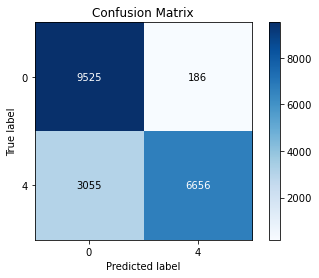

Accuracy: 0.83313 
Precision: 0.97281 
Recall: 0.68541 
F-measure: 0.80420 


In [93]:
y_u2r_rfe_prediction = SVM(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

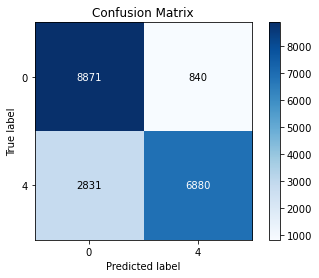

Accuracy: 0.81099 
Precision: 0.89119 
Recall: 0.70847 
F-measure: 0.78940 


In [94]:
y_u2r_rfe_prediction = SVM(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Feature selection

In [95]:
X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [96]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [97]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9638385280126119,
 'Mean Training Precision': 0.9722110095468357,
 'Mean Training Recall': 0.9547598839986687,
 'Mean Training F1 Score': 0.9633584342839114,
 'Mean Validation Accuracy': 0.9602703084179065,
 'Mean Validation Precision': 0.9638611727490602,
 'Mean Validation Recall': 0.9545941651459829,
 'Mean Validation F1 Score': 0.9590022866004755}

#### K-fold cross validation on dos Standard Scaler

In [98]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9828060973254583,
 'Mean Training Precision': 0.9872532202466335,
 'Mean Training Recall': 0.9782221002679472,
 'Mean Training F1 Score': 0.9827168772898984,
 'Mean Validation Accuracy': 0.9824405773938034,
 'Mean Validation Precision': 0.9841390304346053,
 'Mean Validation Recall': 0.9783562793347065,
 'Mean Validation F1 Score': 0.9812215442082909}

#### Stratified cross validation on dos

In [99]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9646263644758564,
 'Mean Training Precision': 0.9697509191094158,
 'Mean Training Recall': 0.959172527966013,
 'Mean Training F1 Score': 0.9644325558355865,
 'Mean Validation Accuracy': 0.9645397378525302,
 'Mean Validation Precision': 0.9695946387904091,
 'Mean Validation Recall': 0.9591642782065944,
 'Mean Validation F1 Score': 0.9643478456948044}

#### Stratified cross validation on dos Standard Scaler

In [100]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9828440468733243,
 'Mean Training Precision': 0.9873128676839764,
 'Mean Training Recall': 0.9782588969898596,
 'Mean Training F1 Score': 0.9827650183426482,
 'Mean Validation Accuracy': 0.9828044341798148,
 'Mean Validation Precision': 0.9872192982938282,
 'Mean Validation Recall': 0.9782754028411043,
 'Mean Validation F1 Score': 0.9827254560300149}

#### Predict on dos

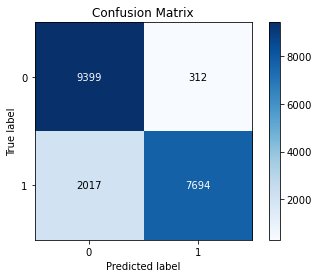

Accuracy: 0.88008 
Precision: 0.96103 
Recall: 0.79230 
F-measure: 0.86854 


In [101]:
y_dos_rfe_prediction = SVM(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

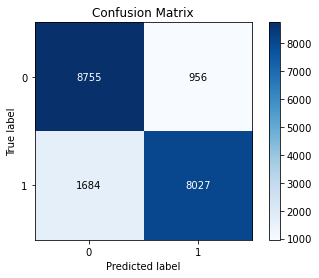

Accuracy: 0.86407 
Precision: 0.89358 
Recall: 0.82659 
F-measure: 0.85878 


In [102]:
y_dos_rfe_prediction = SVM(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [103]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9490535159730301,
 'Mean Training Precision': 0.9392300184724893,
 'Mean Training Recall': 0.9594457431551039,
 'Mean Training F1 Score': 0.9492287933561341,
 'Mean Validation Accuracy': 0.9451319872936177,
 'Mean Validation Precision': 0.8397783090985481,
 'Mean Validation Recall': 0.9578331539066216,
 'Mean Validation F1 Score': 0.8891137648537066}

#### K-fold cross validation on probe Standard Scaler

In [104]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9505995092391784,
 'Mean Training Precision': 0.9379211393672217,
 'Mean Training Recall': 0.9637692136596859,
 'Mean Training F1 Score': 0.9506692446328262,
 'Mean Validation Accuracy': 0.9460155223834784,
 'Mean Validation Precision': 0.8403721128572027,
 'Mean Validation Recall': 0.962193606638509,
 'Mean Validation F1 Score': 0.891216218604342}

#### Stratified cross validation on probe

In [105]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9490477442475882,
 'Mean Training Precision': 0.9395637210344472,
 'Mean Training Recall': 0.9598357988464776,
 'Mean Training F1 Score': 0.9495915637108476,
 'Mean Validation Accuracy': 0.9489776312183322,
 'Mean Validation Precision': 0.9394264811351087,
 'Mean Validation Recall': 0.9598473149475376,
 'Mean Validation F1 Score': 0.9495254698849218}

#### Stratified cross validation on probe Standard Scaler

In [106]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9505920771402854,
 'Mean Training Precision': 0.9379195496457123,
 'Mean Training Recall': 0.9650611212540392,
 'Mean Training F1 Score': 0.9512967678998476,
 'Mean Validation Accuracy': 0.9504848481888353,
 'Mean Validation Precision': 0.93783012229583,
 'Mean Validation Recall': 0.9649406583705025,
 'Mean Validation F1 Score': 0.9511892697673229}

#### Predict on probe

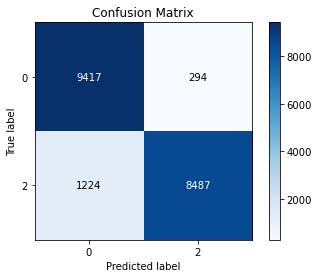

Accuracy: 0.92184 
Precision: 0.96652 
Recall: 0.87396 
F-measure: 0.91791 


In [107]:
y_probe_rfe_prediction = SVM(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

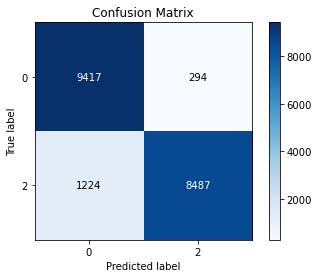

Accuracy: 0.92184 
Precision: 0.96652 
Recall: 0.87396 
F-measure: 0.91791 


In [108]:
y_r2l_rfe_prediction = SVM(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [109]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9453956282781222,
 'Mean Training Precision': 0.9413925165604159,
 'Mean Training Recall': 0.9486454089634704,
 'Mean Training F1 Score': 0.944983536389298,
 'Mean Validation Accuracy': 0.9436839349917528,
 'Mean Validation Precision': 0.5941837371566437,
 'Mean Validation Recall': 0.9470153201905953,
 'Mean Validation F1 Score': 0.6439280868092304}

#### K-fold cross validation on r2l Standard Scaler

In [110]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9664858372023659,
 'Mean Training Precision': 0.9671294432951493,
 'Mean Training Recall': 0.9647936731739429,
 'Mean Training F1 Score': 0.9659367205504369,
 'Mean Validation Accuracy': 0.957241217405298,
 'Mean Validation Precision': 0.6281711615539912,
 'Mean Validation Recall': 0.9592256818661686,
 'Mean Validation F1 Score': 0.691095805443564}

#### Stratified cross validation on r2l

In [111]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9454038774832891,
 'Mean Training Precision': 0.9424967481695496,
 'Mean Training Recall': 0.9486888844518614,
 'Mean Training F1 Score': 0.9455826594565891,
 'Mean Validation Accuracy': 0.9454360393906759,
 'Mean Validation Precision': 0.9425554597052266,
 'Mean Validation Recall': 0.9486954851765542,
 'Mean Validation F1 Score': 0.9456137250199628}

#### Stratified cross validation on r2l Standard Scaler

In [112]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9665650309929875,
 'Mean Training Precision': 0.9657515491110015,
 'Mean Training Recall': 0.967438668275539,
 'Mean Training F1 Score': 0.9665942763599034,
 'Mean Validation Accuracy': 0.966551824457014,
 'Mean Validation Precision': 0.9658163076707543,
 'Mean Validation Recall': 0.9673462836046356,
 'Mean Validation F1 Score': 0.9665789322059994}

#### Predict on r2l

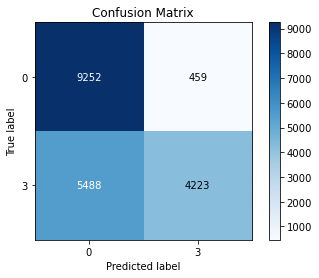

Accuracy: 0.69380 
Precision: 0.90196 
Recall: 0.43487 
F-measure: 0.58681 


In [113]:
y_r2l_rfe_prediction = SVM(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

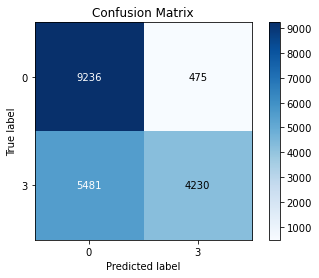

Accuracy: 0.69334 
Precision: 0.89904 
Recall: 0.43559 
F-measure: 0.58685 


In [114]:
y_r2l_rfe_prediction = SVM(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [115]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.8830695913033033,
 'Mean Training Precision': 0.9180530057736389,
 'Mean Training Recall': 0.838050429707612,
 'Mean Training F1 Score': 0.876227025141587,
 'Mean Validation Accuracy': 0.872219857595535,
 'Mean Validation Precision': 0.5039521246315282,
 'Mean Validation Recall': 0.8248663042677128,
 'Mean Validation F1 Score': 0.4595786668562741}

#### K-fold cross validation on u2r Standard Scaler

In [116]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9808732150629634,
 'Mean Training Precision': 0.9662638152891416,
 'Mean Training Recall': 0.9955510612893306,
 'Mean Training F1 Score': 0.9806876845945629,
 'Mean Validation Accuracy': 0.9778897325151688,
 'Mean Validation Precision': 0.5101024838998276,
 'Mean Validation Recall': 0.9836663644762236,
 'Mean Validation F1 Score': 0.5178852934816289}

#### Stratified cross validation on u2r

In [117]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.8821142842395139,
 'Mean Training Precision': 0.9195332910300482,
 'Mean Training Recall': 0.837518377246903,
 'Mean Training F1 Score': 0.8766116470733623,
 'Mean Validation Accuracy': 0.8821184150922811,
 'Mean Validation Precision': 0.9195287318265877,
 'Mean Validation Recall': 0.8375333386691961,
 'Mean Validation F1 Score': 0.876607294684162}

#### Stratified cross validation on u2r Standard Scaler

In [118]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9804805253287066,
 'Mean Training Precision': 0.9666516264991495,
 'Mean Training Recall': 0.9952977044307912,
 'Mean Training F1 Score': 0.9807655293223932,
 'Mean Validation Accuracy': 0.9804360001405067,
 'Mean Validation Precision': 0.9666606448136397,
 'Mean Validation Recall': 0.9952036745132513,
 'Mean Validation F1 Score': 0.980722093244154}

#### Predict on u2r

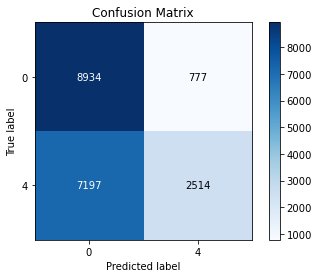

Accuracy: 0.58943 
Precision: 0.76390 
Recall: 0.25888 
F-measure: 0.38671 


In [119]:
y_u2r_rfe_prediction = SVM(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

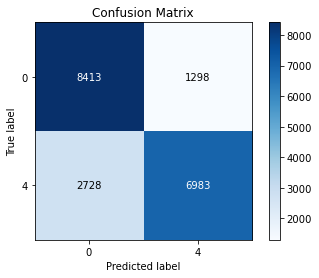

Accuracy: 0.79271 
Precision: 0.84326 
Recall: 0.71908 
F-measure: 0.77623 


In [120]:
y_u2r_rfe_prediction = SVM(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

# Full DF, no Oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

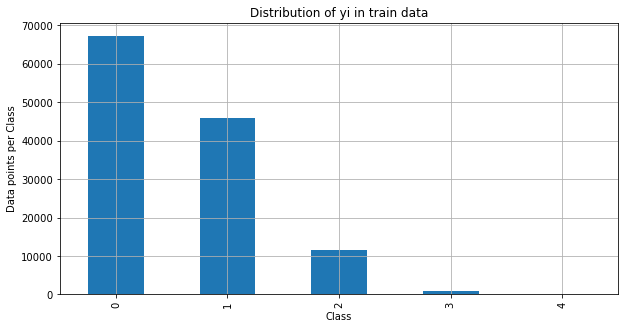

In [121]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()


fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

fullDf['label'], fullDf_test['label'] = prepareMulticlass()

plotDf(fullDf['label'])

In [122]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(fullDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(fullDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)


In [123]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

#### K-fold cross validation on dos

In [124]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9862835113740029,
 'Mean Training Precision': 0.9942302356288486,
 'Mean Training Recall': 0.9718097887650019,
 'Mean Training F1 Score': 0.9828903211901439,
 'Mean Validation Accuracy': 0.9861746269974399,
 'Mean Validation Precision': 0.9940918652900711,
 'Mean Validation Recall': 0.9716814259268036,
 'Mean Validation F1 Score': 0.9827556404345008}

#### K-fold cross validation on dos Standard Scaling

In [125]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9980508715654827,
 'Mean Training Precision': 0.9969629530364339,
 'Mean Training Recall': 0.9982339019392649,
 'Mean Training F1 Score': 0.9975979951351075,
 'Mean Validation Accuracy': 0.9978458550366381,
 'Mean Validation Precision': 0.9965204116410783,
 'Mean Validation Recall': 0.9981725414671976,
 'Mean Validation F1 Score': 0.9973453951734426}

#### Stratified cross validation on dos

In [126]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9860186574850651,
 'Mean Training Precision': 0.9942164549191878,
 'Mean Training Recall': 0.9711668001694711,
 'Mean Training F1 Score': 0.982555502043524,
 'Mean Validation Accuracy': 0.9860422000529707,
 'Mean Validation Precision': 0.9943380715729638,
 'Mean Validation Recall': 0.9711063874658526,
 'Mean Validation F1 Score': 0.9825827768657621}

#### Stratified cross validation on dos Standard Scaling

In [127]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9980528334461415,
 'Mean Training Precision': 0.9969628935782268,
 'Mean Training Recall': 0.9982387498492941,
 'Mean Training F1 Score': 0.9976003857829603,
 'Mean Validation Accuracy': 0.9978546834996027,
 'Mean Validation Precision': 0.9965225330080228,
 'Mean Validation Recall': 0.9981927789675396,
 'Mean Validation F1 Score': 0.9973566598574262}

#### Predict on dos

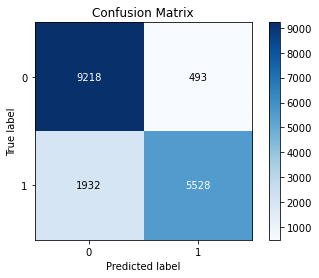

Accuracy: 0.85877 
Precision: 0.91812 
Recall: 0.74102 
F-measure: 0.82012 


In [128]:
y_dos_prediction = SVM(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

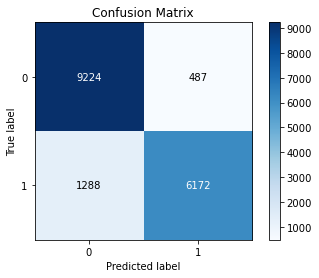

Accuracy: 0.89663 
Precision: 0.92687 
Recall: 0.82735 
F-measure: 0.87428 


In [129]:
y_dos_prediction = SVM(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [130]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9767352788070769,
 'Mean Training Precision': 0.939295227822344,
 'Mean Training Recall': 0.9004667073102116,
 'Mean Training F1 Score': 0.9179676526636726,
 'Mean Validation Accuracy': 0.9768984970057097,
 'Mean Validation Precision': 0.9386758988646633,
 'Mean Validation Recall': 0.9017139478039153,
 'Mean Validation F1 Score': 0.9182047282463719}

#### K-fold cross validation on probe Standard Scaling

In [131]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9919155094037079,
 'Mean Training Precision': 0.9775476843698149,
 'Mean Training Recall': 0.9674267728125638,
 'Mean Training F1 Score': 0.9724606380917219,
 'Mean Validation Accuracy': 0.991531530188888,
 'Mean Validation Precision': 0.9757697927572991,
 'Mean Validation Recall': 0.9665663949590135,
 'Mean Validation F1 Score': 0.97113700323539}

#### Stratified cross validation on probe

In [132]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9725790988848992,
 'Mean Training Precision': 0.93820635066869,
 'Mean Training Recall': 0.8677150781290678,
 'Mean Training F1 Score': 0.8890553273974664,
 'Mean Validation Accuracy': 0.972366885088803,
 'Mean Validation Precision': 0.938689838174616,
 'Mean Validation Recall': 0.8666972666170982,
 'Mean Validation F1 Score': 0.8874907121406694}

#### Stratified cross validation on probe Standard Scaling

In [133]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9919155094037079,
 'Mean Training Precision': 0.9775108353475288,
 'Mean Training Recall': 0.9674654983676145,
 'Mean Training F1 Score': 0.9724619637103864,
 'Mean Validation Accuracy': 0.9915821631002804,
 'Mean Validation Precision': 0.9761132477811234,
 'Mean Validation Recall': 0.9666260057862617,
 'Mean Validation F1 Score': 0.9713338228655175}

#### Predict on probe

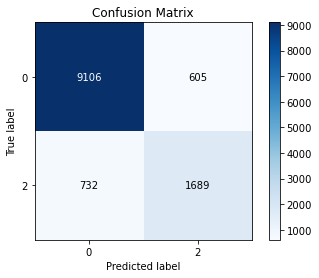

Accuracy: 0.88980 
Precision: 0.73627 
Recall: 0.69765 
F-measure: 0.71644 


In [134]:
y_probe_prediction = SVM(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

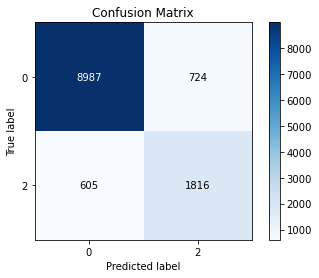

Accuracy: 0.89045 
Precision: 0.71496 
Recall: 0.75010 
F-measure: 0.73211 


In [135]:
y_probe_prediction = SVM(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [136]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9939500115247858,
 'Mean Training Precision': 0.8243486318377643,
 'Mean Training Recall': 0.7400160698339896,
 'Mean Training F1 Score': 0.7776632692812522,
 'Mean Validation Accuracy': 0.9936198669362701,
 'Mean Validation Precision': 0.8101923035309854,
 'Mean Validation Recall': 0.7349199956539217,
 'Mean Validation F1 Score': 0.7682950306919079}

#### K-fold cross validation on r2l Standard Scaling

In [137]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9951613058137369,
 'Mean Training Precision': 0.8432596327552403,
 'Mean Training Recall': 0.8200797545827113,
 'Mean Training F1 Score': 0.8314987281892849,
 'Mean Validation Accuracy': 0.9947613132245129,
 'Mean Validation Precision': 0.8244594446373916,
 'Mean Validation Recall': 0.8128947054723399,
 'Mean Validation F1 Score': 0.8178903862273366}

#### Stratified cross validation on r2l

In [138]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9949385568669451,
 'Mean Training Precision': 0.8370107080615924,
 'Mean Training Recall': 0.8101614874301678,
 'Mean Training F1 Score': 0.8233560900626005,
 'Mean Validation Accuracy': 0.9947466805057538,
 'Mean Validation Precision': 0.8284174630596526,
 'Mean Validation Recall': 0.807070707070707,
 'Mean Validation F1 Score': 0.8170612091223122}

#### Stratified cross validation on r2l Standard Scaling

In [139]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9951775649188359,
 'Mean Training Precision': 0.8438614697886893,
 'Mean Training Recall': 0.8206586691939345,
 'Mean Training F1 Score': 0.8320852980376781,
 'Mean Validation Accuracy': 0.994790580803509,
 'Mean Validation Precision': 0.8258865928554637,
 'Mean Validation Recall': 0.816131313131313,
 'Mean Validation F1 Score': 0.8201889856893242}

#### Predict on r2l

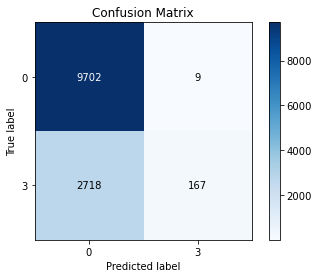

Accuracy: 0.78350 
Precision: 0.94886 
Recall: 0.05789 
F-measure: 0.10911 


In [140]:
y_r2l_prediction = SVM(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

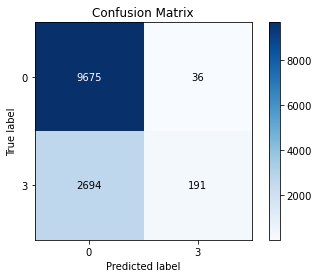

Accuracy: 0.78326 
Precision: 0.84141 
Recall: 0.06620 
F-measure: 0.12275 


In [141]:
y_r2l_prediction = SVM(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [142]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9994674847936841,
 'Mean Training Precision': 0.6031746031746031,
 'Mean Training Recall': 0.3706870106128399,
 'Mean Training F1 Score': 0.4590422502560889,
 'Mean Validation Accuracy': 0.9994955093320559,
 'Mean Validation Precision': 0.6100000000000001,
 'Mean Validation Recall': 0.4225,
 'Mean Validation F1 Score': 0.4802164502164502}

#### K-fold cross validation on u2r Standard Scaling

In [143]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9996554310956617,
 'Mean Training Precision': 0.9367337054399067,
 'Mean Training Recall': 0.5941963230923519,
 'Mean Training F1 Score': 0.7269091884625973,
 'Mean Validation Accuracy': 0.9995103439256766,
 'Mean Validation Precision': 0.7883333333333333,
 'Mean Validation Recall': 0.5366666666666667,
 'Mean Validation F1 Score': 0.6179365079365079}

#### Stratified cross validation on u2r

In [144]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.999503754798388,
 'Mean Training Precision': 0.6852743090243091,
 'Mean Training Recall': 0.4287234042553191,
 'Mean Training F1 Score': 0.5268458728332146,
 'Mean Validation Accuracy': 0.9994806681335404,
 'Mean Validation Precision': 0.6016666666666667,
 'Mean Validation Recall': 0.42000000000000004,
 'Mean Validation F1 Score': 0.4671428571428572}

#### Stratified cross validation on u2r Standard Scaling

In [145]:
stratifiedCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9996570797643616,
 'Mean Training Precision': 0.9304930375314134,
 'Mean Training Recall': 0.6004162812210916,
 'Mean Training F1 Score': 0.7294715238551768,
 'Mean Validation Accuracy': 0.9994955071304243,
 'Mean Validation Precision': 0.7933333333333333,
 'Mean Validation Recall': 0.5000000000000001,
 'Mean Validation F1 Score': 0.5913492063492064}

#### Predict on u2r

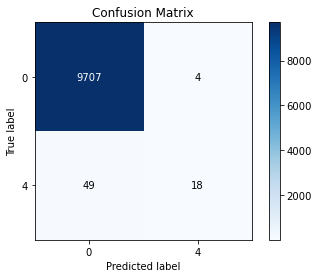

Accuracy: 0.99458 
Precision: 0.81818 
Recall: 0.26866 
F-measure: 0.40449 


In [146]:
y_u2r_prediction = SVM(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

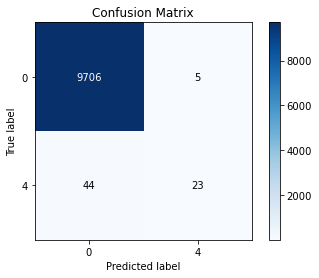

Accuracy: 0.99499 
Precision: 0.82143 
Recall: 0.34328 
F-measure: 0.48421 


In [147]:
y_u2r_prediction = SVM(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

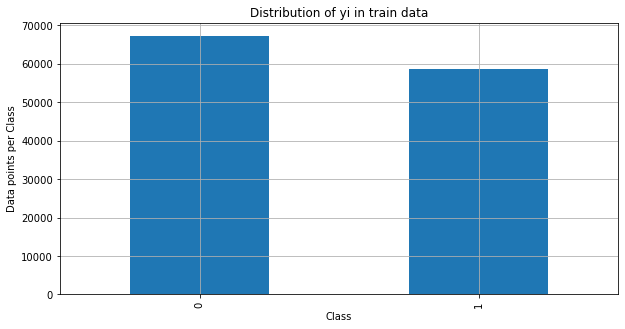

In [148]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()

fullDf['label'], fullDf_test['label'] = prepareBinary()

fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

colNames=list(fullDf)
colNames_test=list(fullDf_test)

plotDf(fullDf['label'])


In [149]:
x_df, y_df = getXandY(fullDf)
x_df_test, y_df_test = getXandY(fullDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)


In [150]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9424893830669419,
 'Mean Training Precision': 0.9577542258668343,
 'Mean Training Recall': 0.9166325814340986,
 'Mean Training F1 Score': 0.9365382385933605,
 'Mean Validation Accuracy': 0.9421627418730256,
 'Mean Validation Precision': 0.9572882600001742,
 'Mean Validation Recall': 0.916190325356687,
 'Mean Validation F1 Score': 0.936063951135902}

In [151]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.973806556206144,
 'Mean Training Precision': 0.9796517184416789,
 'Mean Training Recall': 0.9637386711465268,
 'Mean Training F1 Score': 0.9716298181582512,
 'Mean Validation Accuracy': 0.9736530933671175,
 'Mean Validation Precision': 0.9795035995694678,
 'Mean Validation Recall': 0.9635506504117556,
 'Mean Validation F1 Score': 0.971459244724221}

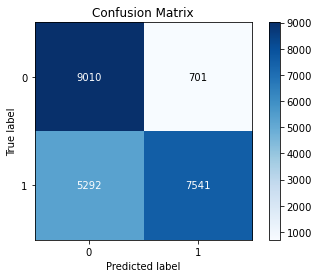

Accuracy: 0.73416 
Precision: 0.91495 
Recall: 0.58763 
F-measure: 0.71563 


In [152]:
y_prediction = SVM(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

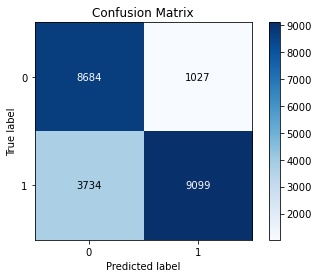

Accuracy: 0.78881 
Precision: 0.89858 
Recall: 0.70903 
F-measure: 0.79263 


In [153]:
y_prediction = SVM(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [154]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(x_df), y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [155]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(x_df_ss), y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [156]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9524113193212014,
 'Mean Training Precision': 0.959716623756972,
 'Mean Training Recall': 0.9370840758442567,
 'Mean Training F1 Score': 0.9482652601668768,
 'Mean Validation Accuracy': 0.952402510353598,
 'Mean Validation Precision': 0.9596955717705071,
 'Mean Validation Recall': 0.937102887954703,
 'Mean Validation F1 Score': 0.9482594756932718}

#### K-fold cross validation Standard Scaler

In [157]:
KfoldCV(LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=10000), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9665695562098783,
 'Mean Training Precision': 0.9697263120257645,
 'Mean Training Recall': 0.9580818721468136,
 'Mean Training F1 Score': 0.9638688447988037,
 'Mean Validation Accuracy': 0.9665166524943766,
 'Mean Validation Precision': 0.969643285921261,
 'Mean Validation Recall': 0.9580684233120212,
 'Mean Validation F1 Score': 0.9638181007559631}

#### Predict

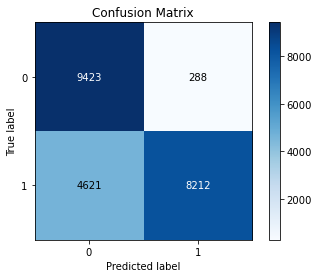

Accuracy: 0.78225 
Precision: 0.96612 
Recall: 0.63991 
F-measure: 0.76989 


In [158]:
y_prediction = SVM(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

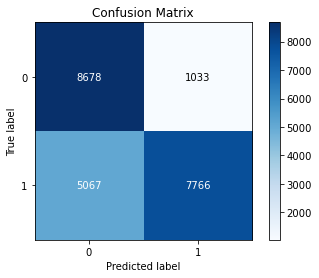

Accuracy: 0.72942 
Precision: 0.88260 
Recall: 0.60516 
F-measure: 0.71801 


In [159]:
y_prediction = SVM(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)